In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [60]:
# https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers
df = pd.read_csv('../data/papers.csv')
df.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [61]:
# Check for duplicates
df.duplicated().sum()

0

In [62]:
# Check for missing values in each column
df.isnull().sum()

title       0
authors     0
groups      2
keywords    0
topics      4
abstract    0
dtype: int64

In [63]:
# Regex to get list of text inside parenthesis in groups column
df['groupsList'] = df['groups'].str.findall(r'\((.*?)\)')

# Onehot encoding of groupsList column
df = df.join(pd.get_dummies(df['groupsList'].apply(pd.Series).stack(), prefix="groups_").groupby(level=0).sum())

# Drop groupsList and groups columns
df.drop(['groupsList', 'groups'], axis=1, inplace=True)

df.head()

,title,authors,keywords,topics,abstract,groups__AIW,groups__APP,groups__CM,groups__CS,groups__CSAI,...,groups__MLA,groups__NLPKR,groups__NLPML,groups__NLPTM,groups__NMLA,groups__PS,groups__ROB,groups__RU,groups__SCS,groups__VIS
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co...",0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
# Split keywords column into list of keywords
df['keywordsList'] = df['keywords'].str.split('\n')

# Onehot encoding of keywordsList column
df = df.join(pd.get_dummies(df['keywordsList'].apply(pd.Series).stack(), prefix="keywords_").groupby(level=0).sum())

# Drop keywordsList and keywords columns
df.drop(['keywordsList', 'keywords'], axis=1, inplace=True)

df.head()

,title,authors,topics,abstract,groups__AIW,groups__APP,groups__CM,groups__CS,groups__CSAI,groups__GPIE,...,keywords__voting systems,keywords__web search personalization,keywords__web-based machine translation,keywords__weighted partial MaxSAT,keywords__word ambiguity,keywords__word embedding,keywords__word proximity,keywords__word sense disambiguation,keywords__worst-case analysis,keywords__writing style
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co...",0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Split topics column into list of topics
df['topicsList'] = df['topics'].str.split('\n')

# Onehot encoding of topicsList column
df = df.join(pd.get_dummies(df['topicsList'].apply(pd.Series).stack(), prefix="topics").groupby(level=0).sum())

# Drop topicsList and topics columns
df.drop(['topicsList', 'topics'], axis=1, inplace=True)

df.head()

,title,authors,abstract,groups__AIW,groups__APP,groups__CM,groups__CS,groups__CSAI,groups__GPIE,groups__GTEP,...,topics_SCS: Satisfiability (General/Other),topics_VIS: Categorization,topics_VIS: Face and Gesture Recognition,topics_VIS: Image and Video Retrieval,topics_VIS: Language and Vision,topics_VIS: Object Detection,topics_VIS: Object Recognition,topics_VIS: Perception,topics_VIS: Statistical Methods and Learning,topics_VIS: Videos
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Transfer learning considers related but distin...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer learning uses relevant auxiliary data...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,The probabilistic serial (PS) rule is one of t...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",As the rapid growth of online social media att...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma","In this paper, we study the low-rank tensor co...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
# Drop title, authors and abstract columns
df.drop(['title', 'authors', 'abstract'], axis=1, inplace=True)

df.head()

,groups__AIW,groups__APP,groups__CM,groups__CS,groups__CSAI,groups__GPIE,groups__GTEP,groups__HAI,groups__HCC,groups__HSO,...,topics_SCS: Satisfiability (General/Other),topics_VIS: Categorization,topics_VIS: Face and Gesture Recognition,topics_VIS: Image and Video Retrieval,topics_VIS: Language and Vision,topics_VIS: Object Detection,topics_VIS: Object Recognition,topics_VIS: Perception,topics_VIS: Statistical Methods and Learning,topics_VIS: Videos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# Replace missing values with 0
df.fillna(0, inplace=True)

In [94]:
def elbow_visualizer(model, df):
    # Instantiate the clustering model and visualizer
    visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

    visualizer.fit(df)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [95]:
def silhouette_visualizer(model, df):
    # Instantiate the clustering model and visualizer
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette' ,timings=False)

    visualizer.fit(df)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [96]:
def calinski_visualizer(model, df):
    # Instantiate the clustering model and visualizer
    visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz' ,timings=False)

    visualizer.fit(df)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

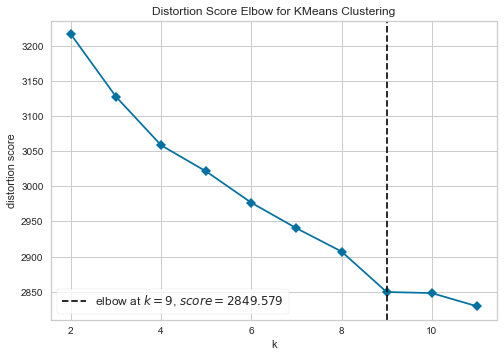

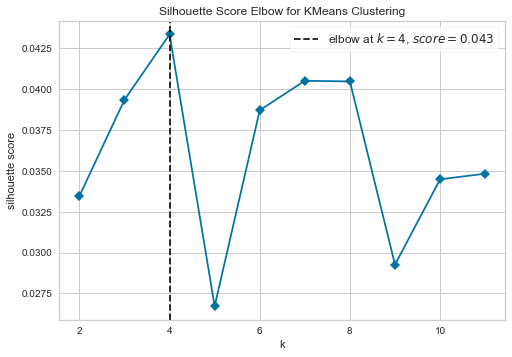

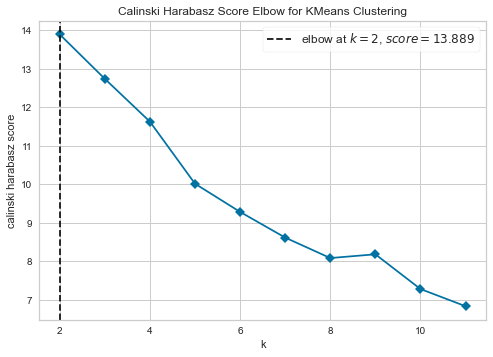

In [97]:
# KMeans clustering

# Create KMeans object
kmeans = KMeans(random_state=42)

# Fit KMeans object to data
kmeans.fit(df)

elbow_visualizer(kmeans, df)
silhouette_visualizer(kmeans, df)
calinski_visualizer(kmeans, df)

c:\Users\naomi\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\naomi\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


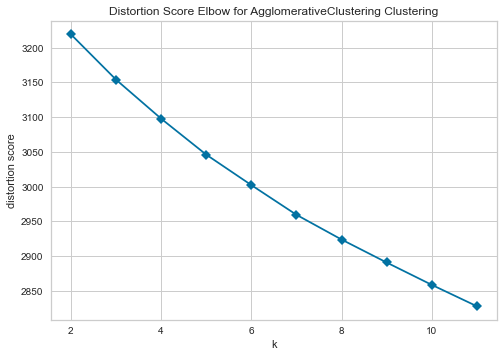

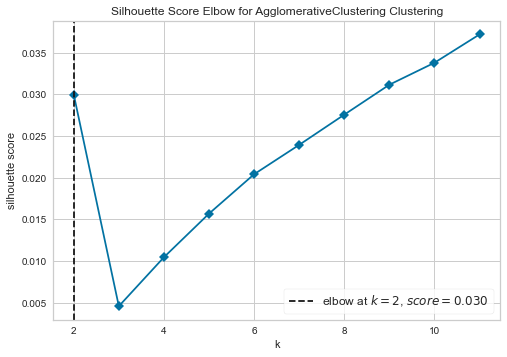

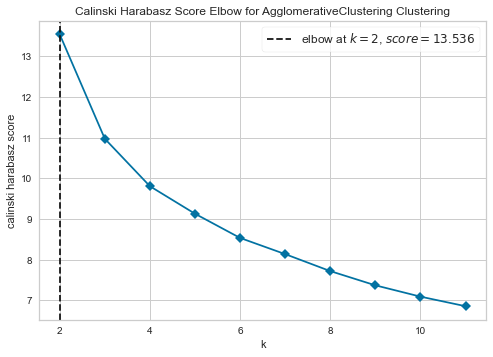

In [103]:
# Hierarchical clustering

# Create AgglomerativeClustering object
agg = AgglomerativeClustering()

# Fit AgglomerativeClustering object to data
agg.fit(df)

elbow_visualizer(agg, df)
silhouette_visualizer(agg, df)
calinski_visualizer(agg, df)

In [108]:
# DBSCAN clustering

# Create DBSCAN object
dbscan = DBSCAN()

# Fit DBSCAN object to data
dbscan.fit(df)

# TODO: Visualize DBSCAN clustering

DBSCAN()